In [1]:
# importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train=pd.read_csv("C:\\Users\\user\\Downloads\\termdeposit_train.csv")
test=pd.read_csv("C:\\Users\\user\\Downloads\\termdeposit_test.csv")

In [3]:
train.head()



,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

In [9]:
train.isnull().sum()


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [11]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


# |Exploratory Data Analyses

## Find Missing Values

In [13]:

# find missing values
features_na = [features for features in train.columns if train[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [14]:
#Find Features with One Value
for column in train.columns:
    print(column,train[column].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


## Explore the Categorical Features

In [15]:
categorical_features=[feature for feature in train.columns if ((train[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is subscribed and number of categories are 2


# Take-away:

there are 10 categorical features

feature job and month has highest number of categorical values

# Find Categorical Feature Distribution

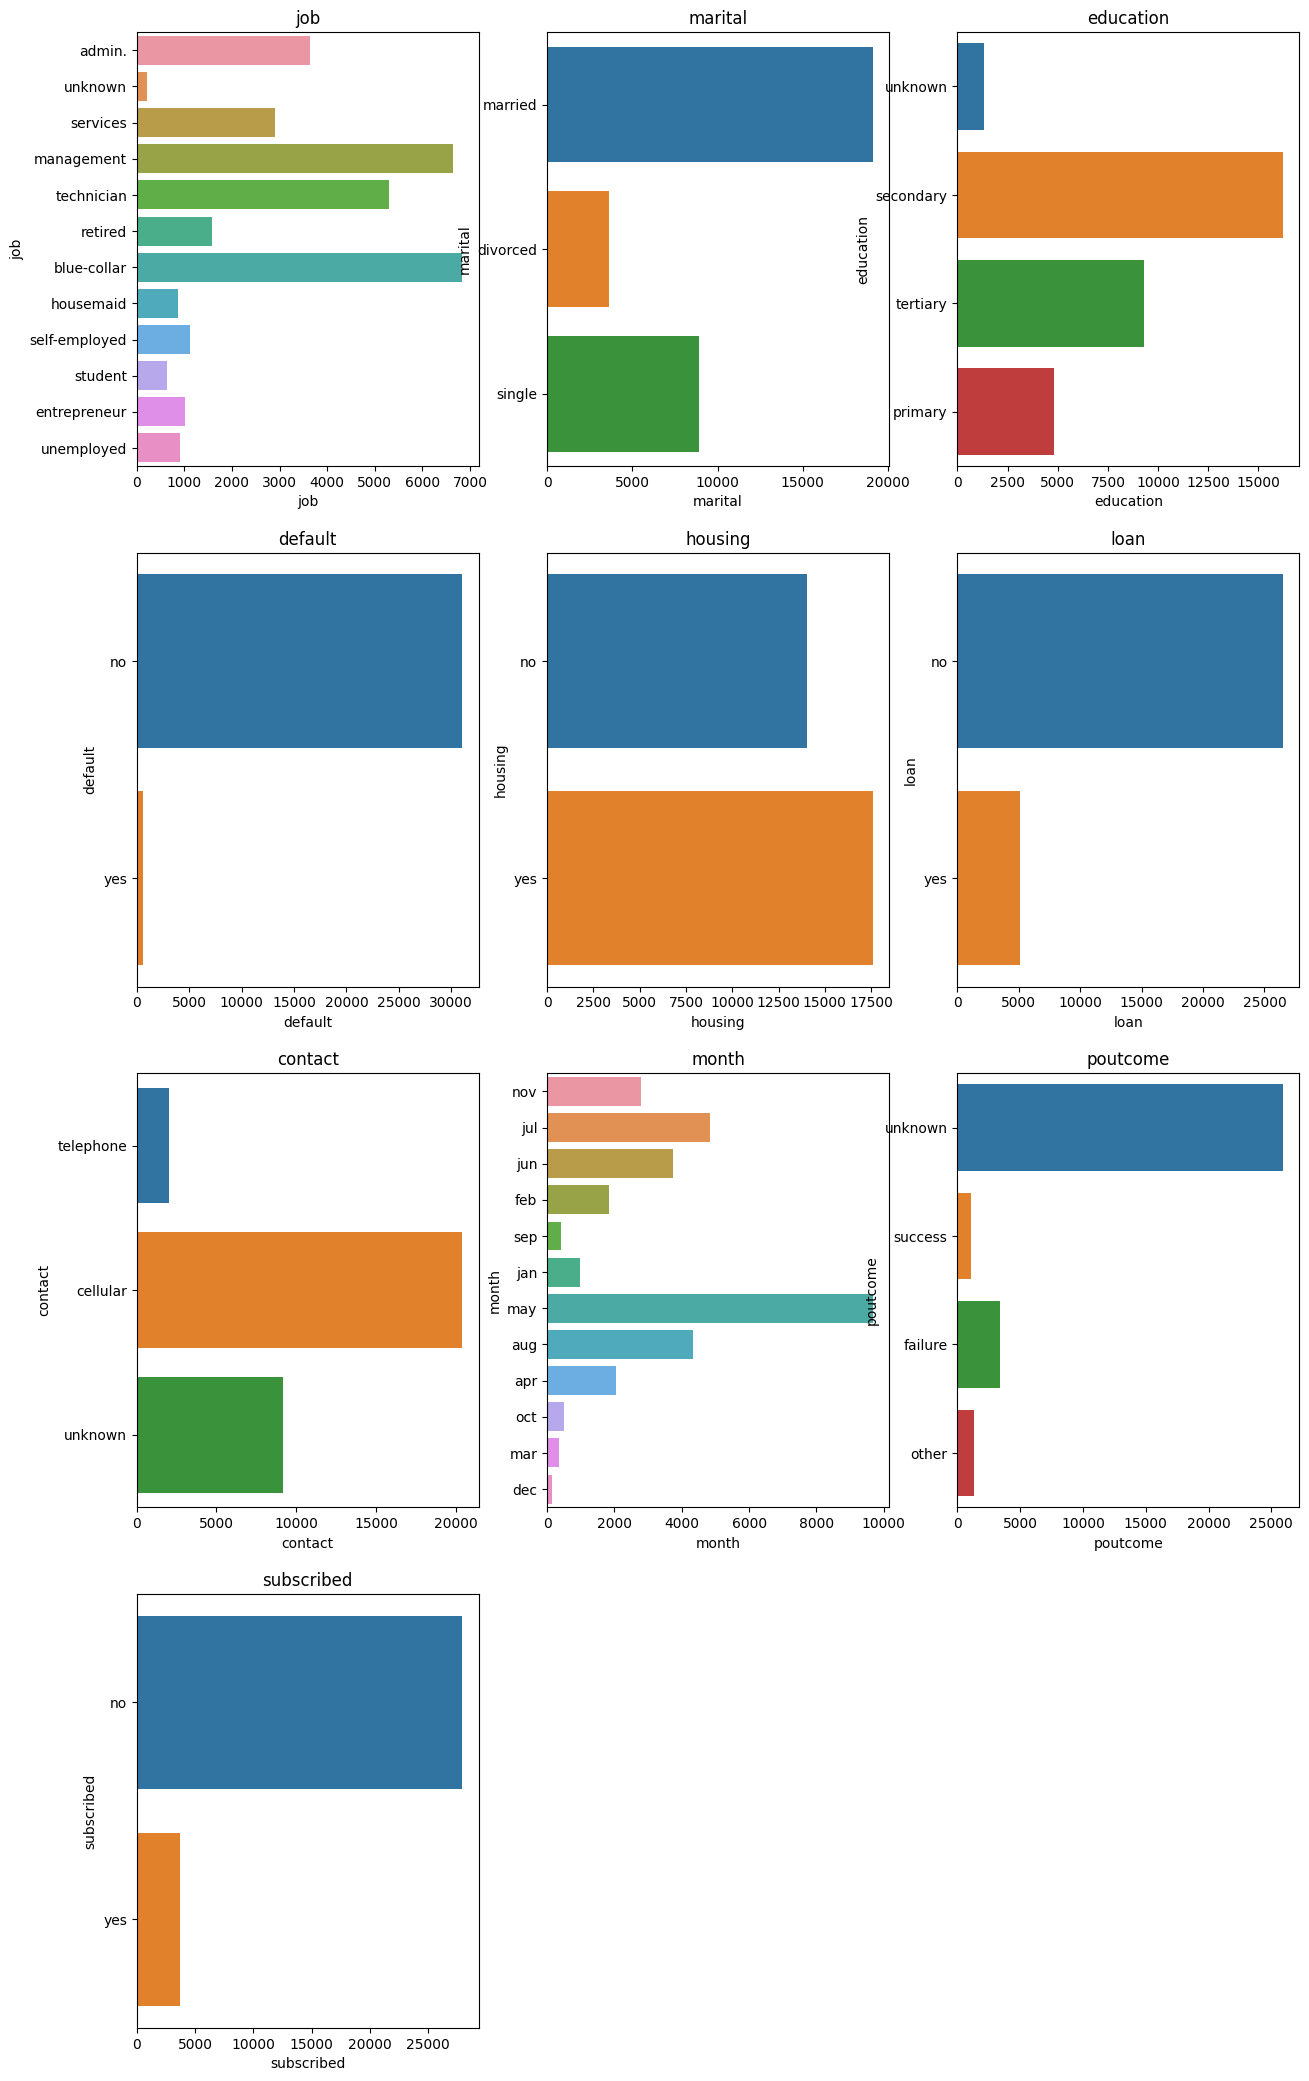

In [17]:

#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


# Relationship between Categorical Features and Label

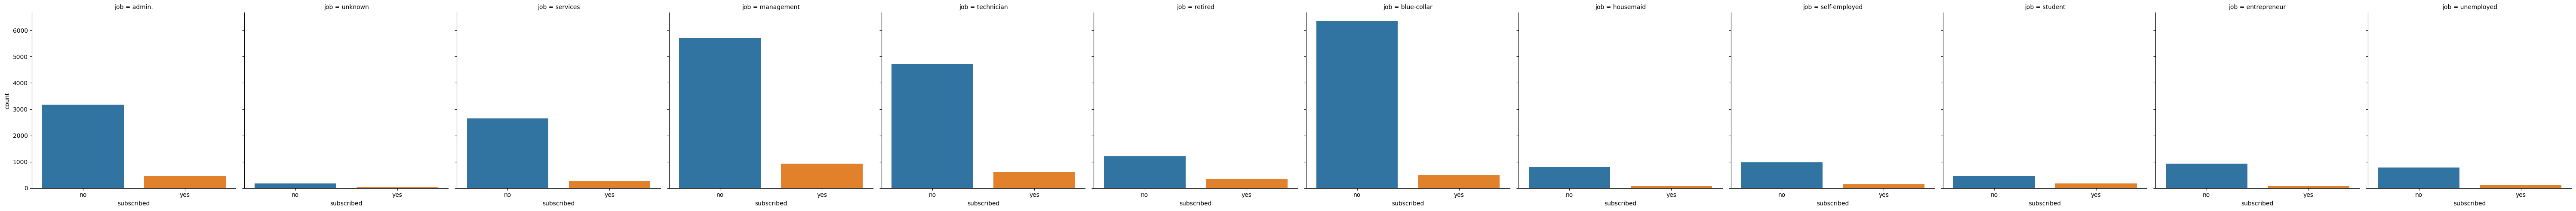

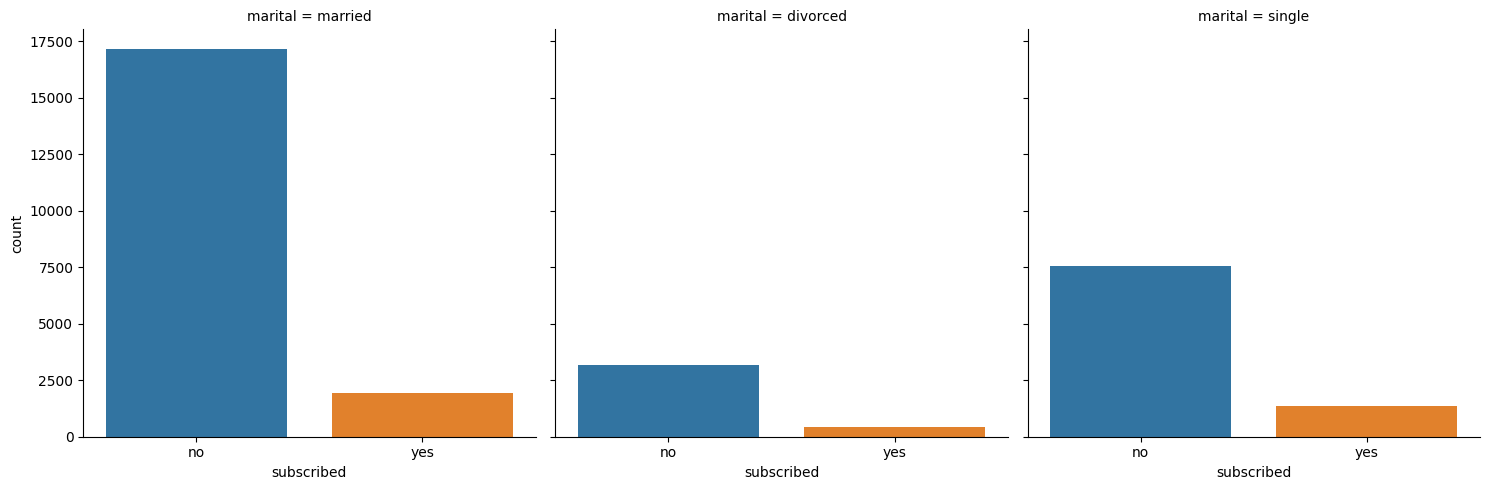

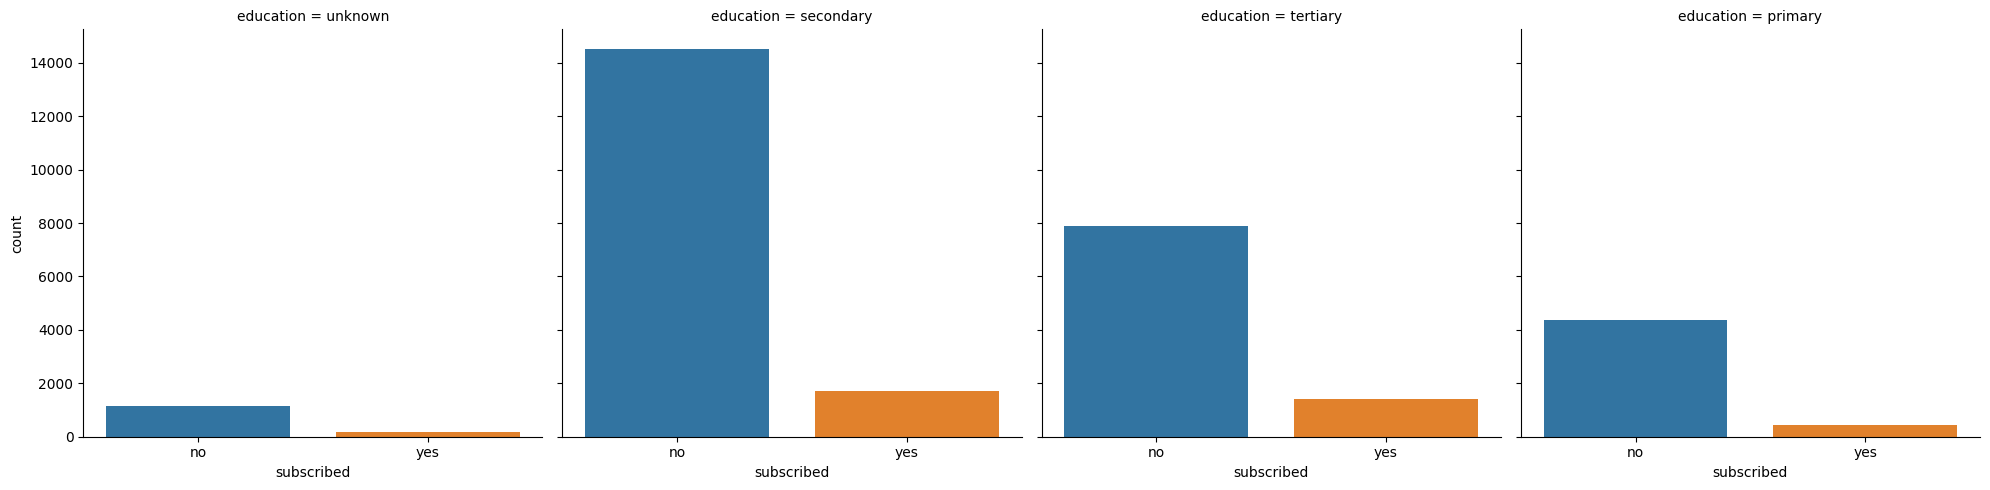

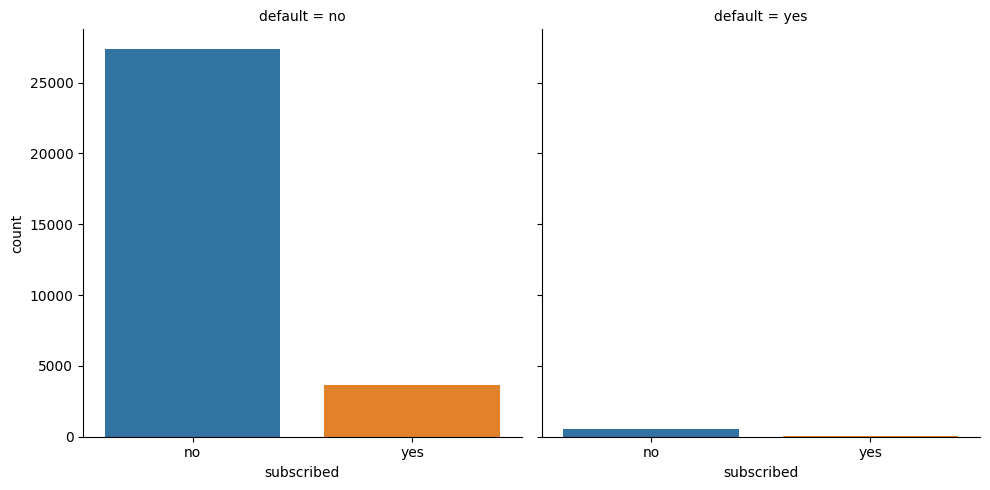

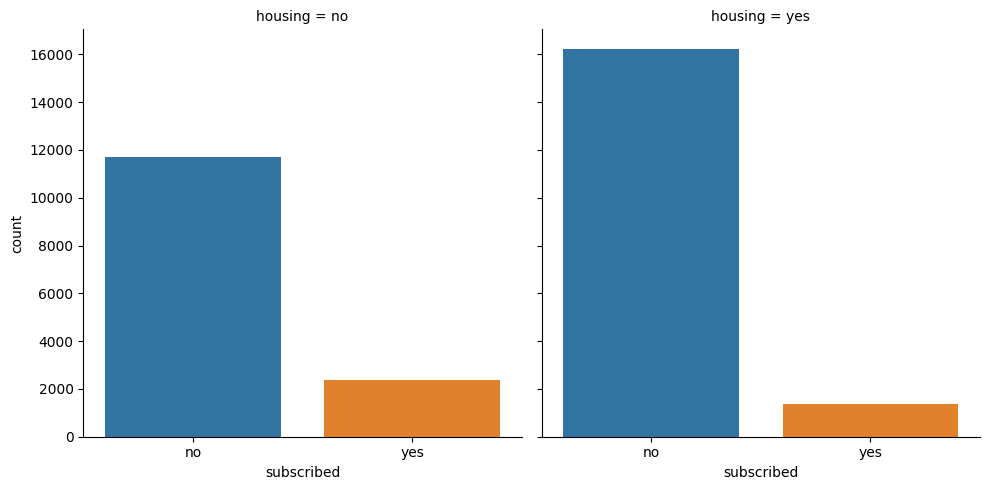

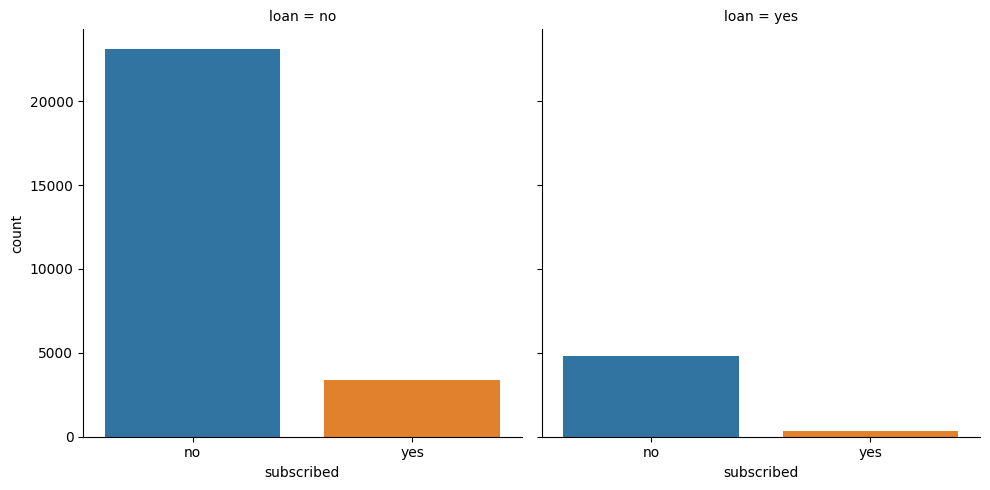

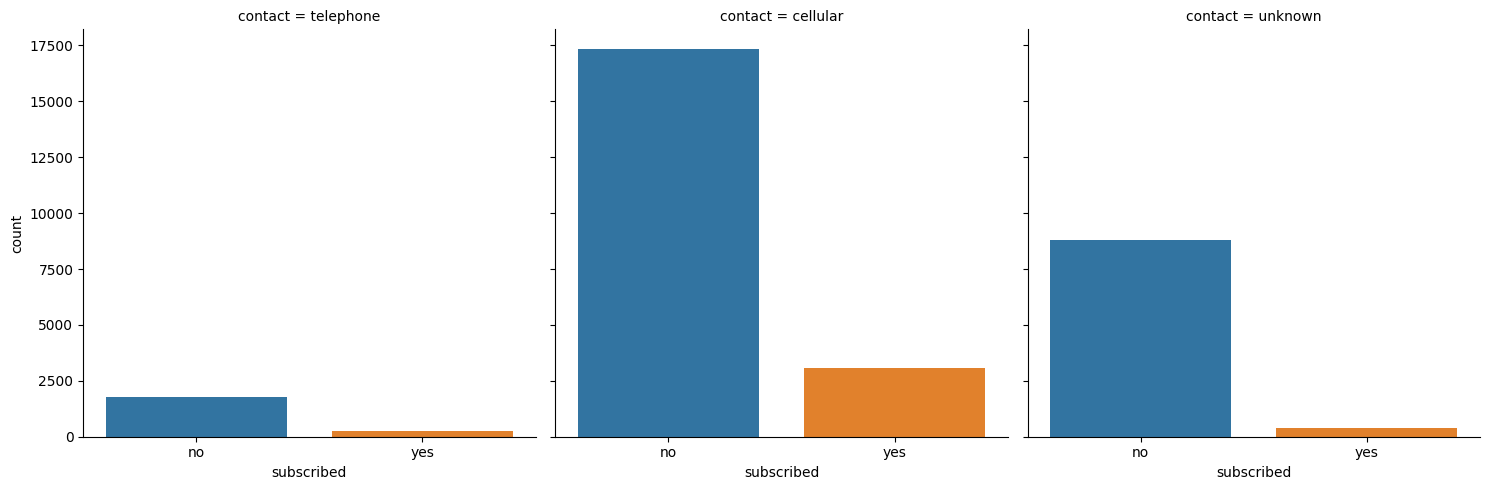

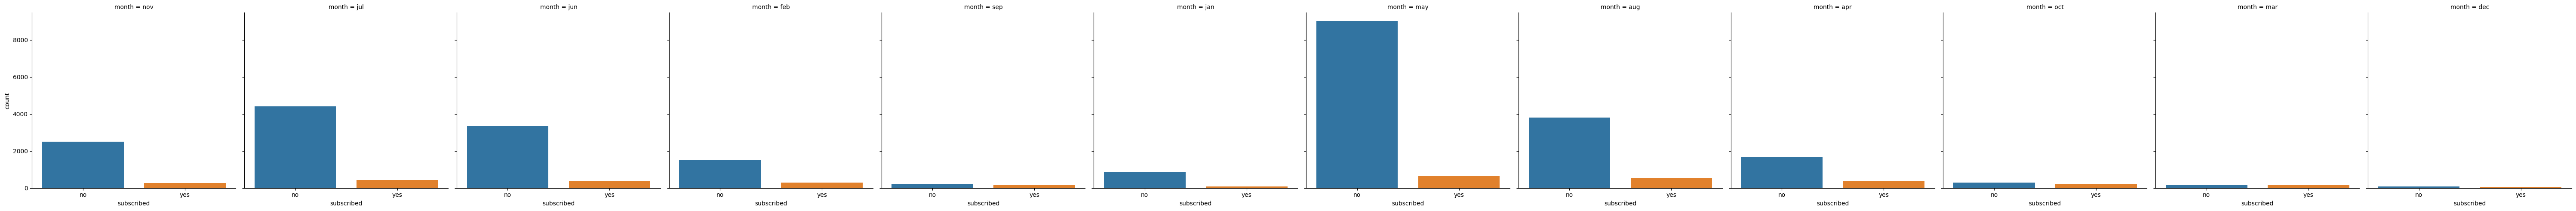

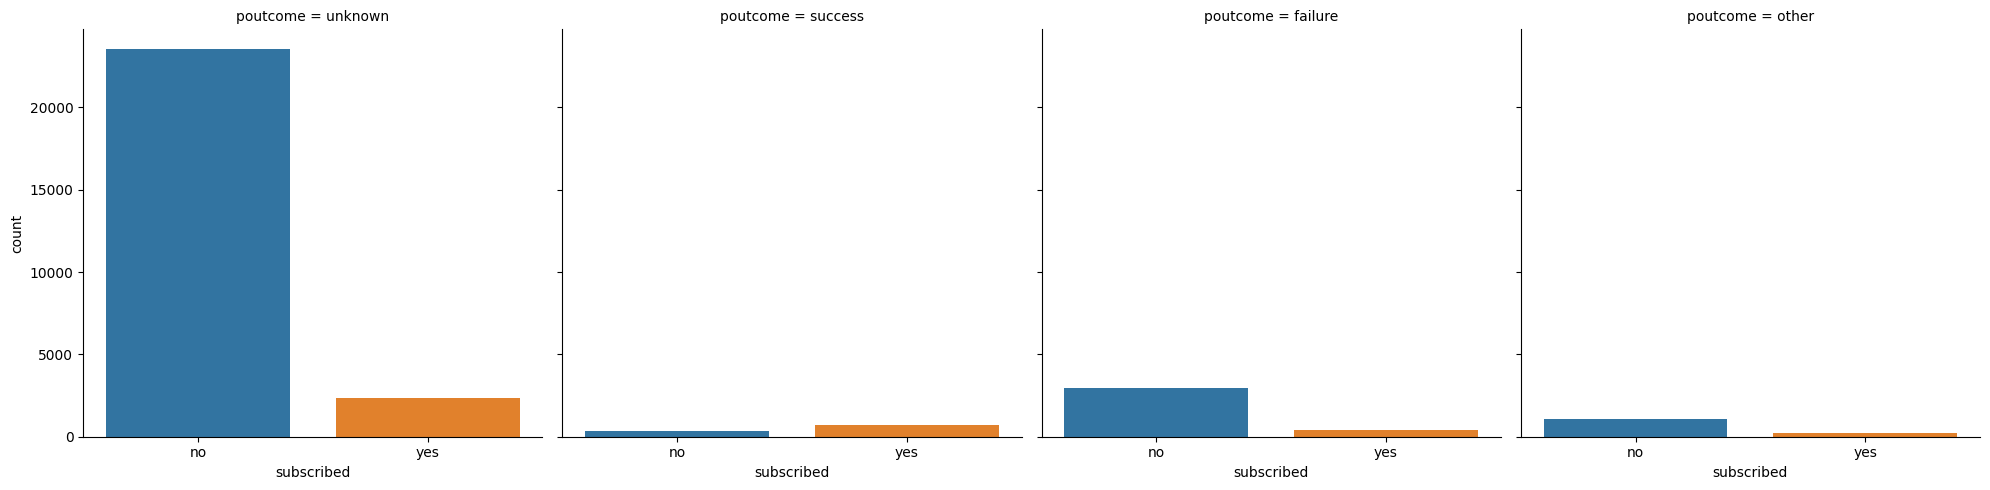

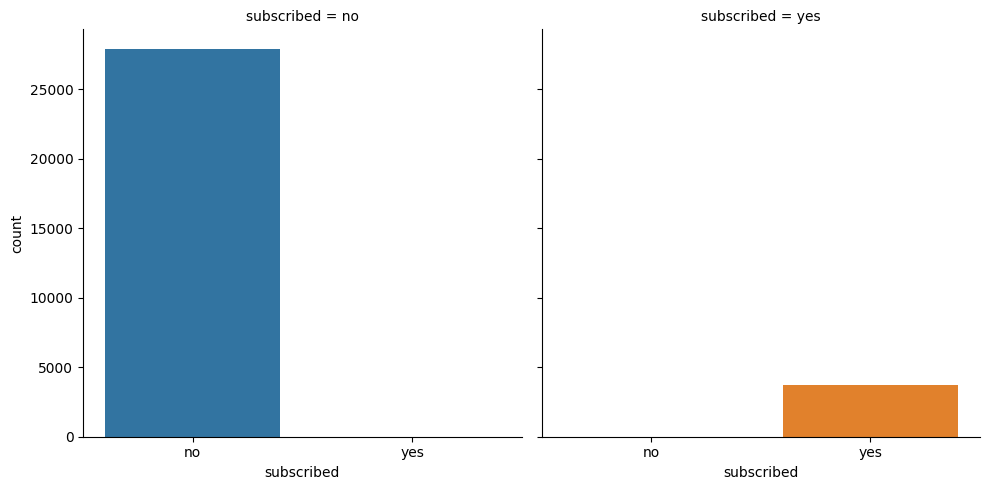

In [18]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed', col=categorical_feature, kind='count', data= train)
plt.show()

In [19]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(train.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

# Explore the Numerical Features

In [20]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if ((train[feature].dtypes != 'O') & (feature not in ['subscribed']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  8


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0


# Find Discrete Numerical Features

In [21]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


# Find Continous Numerical Features

In [22]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['subscribed']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 8


# Distribution of Continous Numerical Features

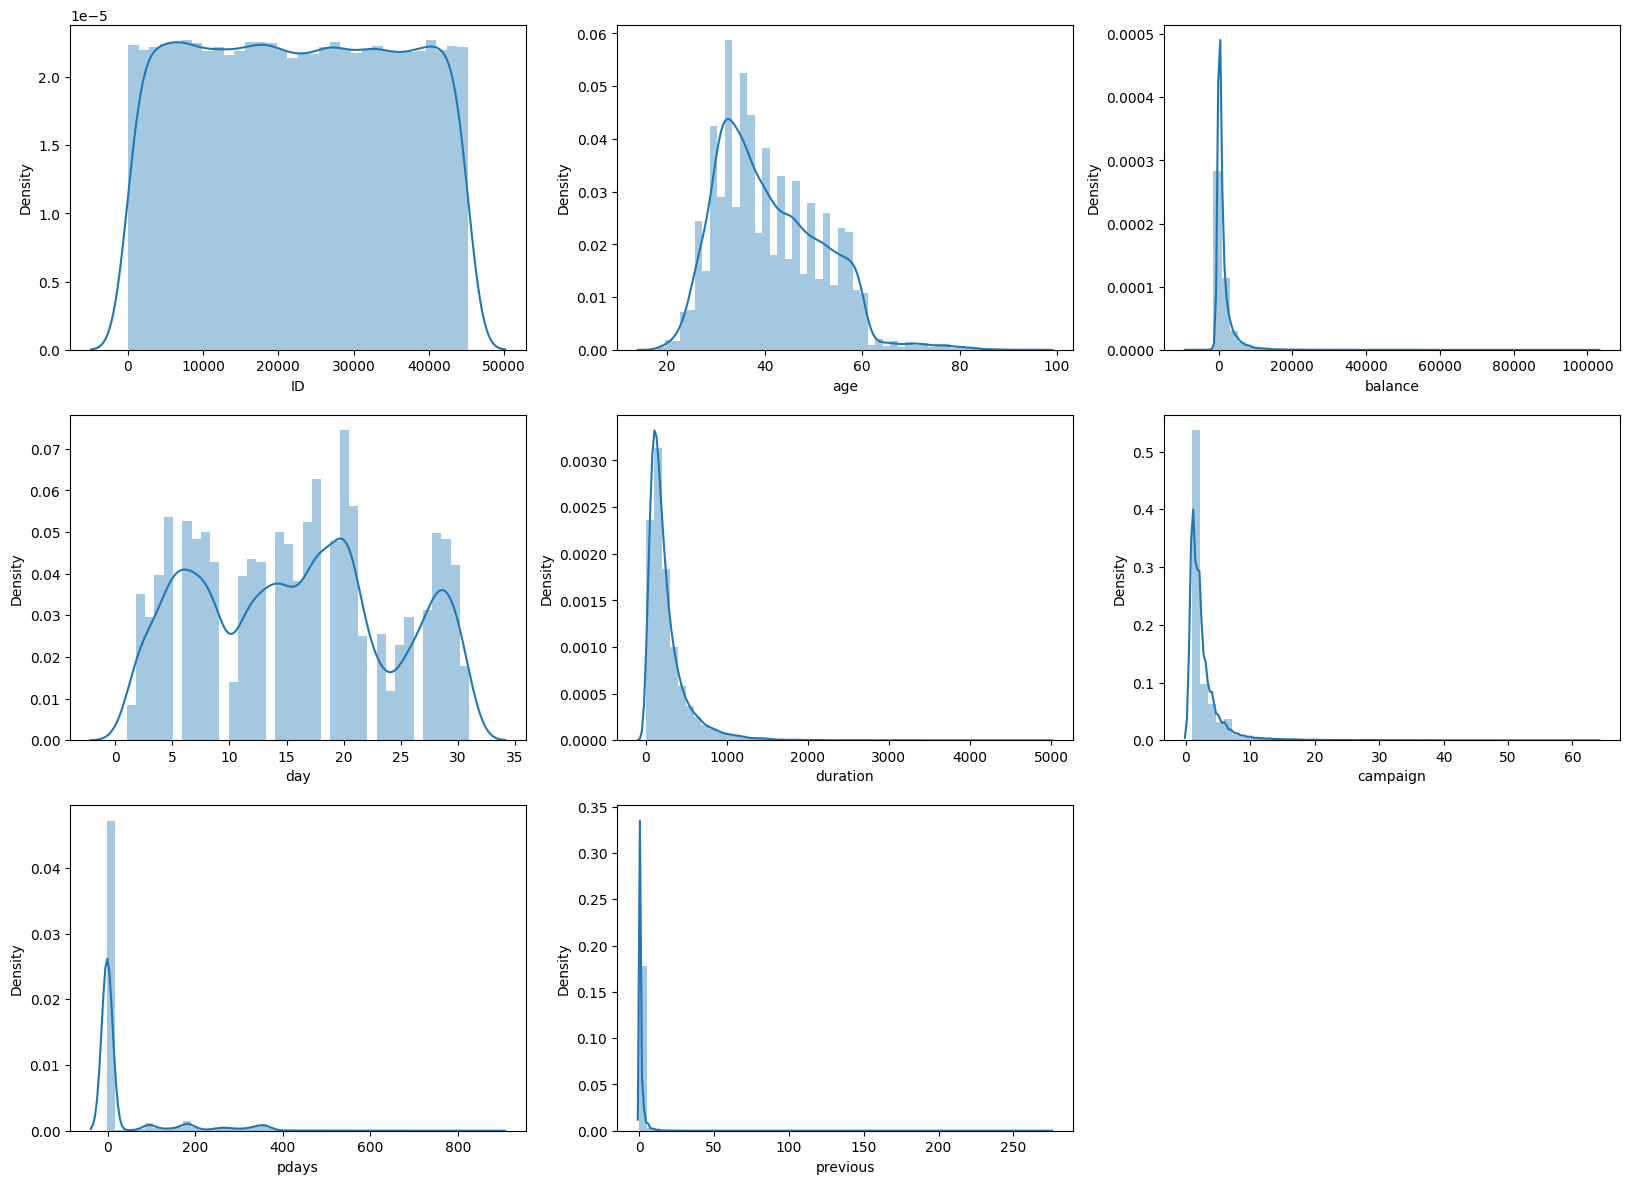

In [23]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

## Relation between Continous numerical Features and Labels

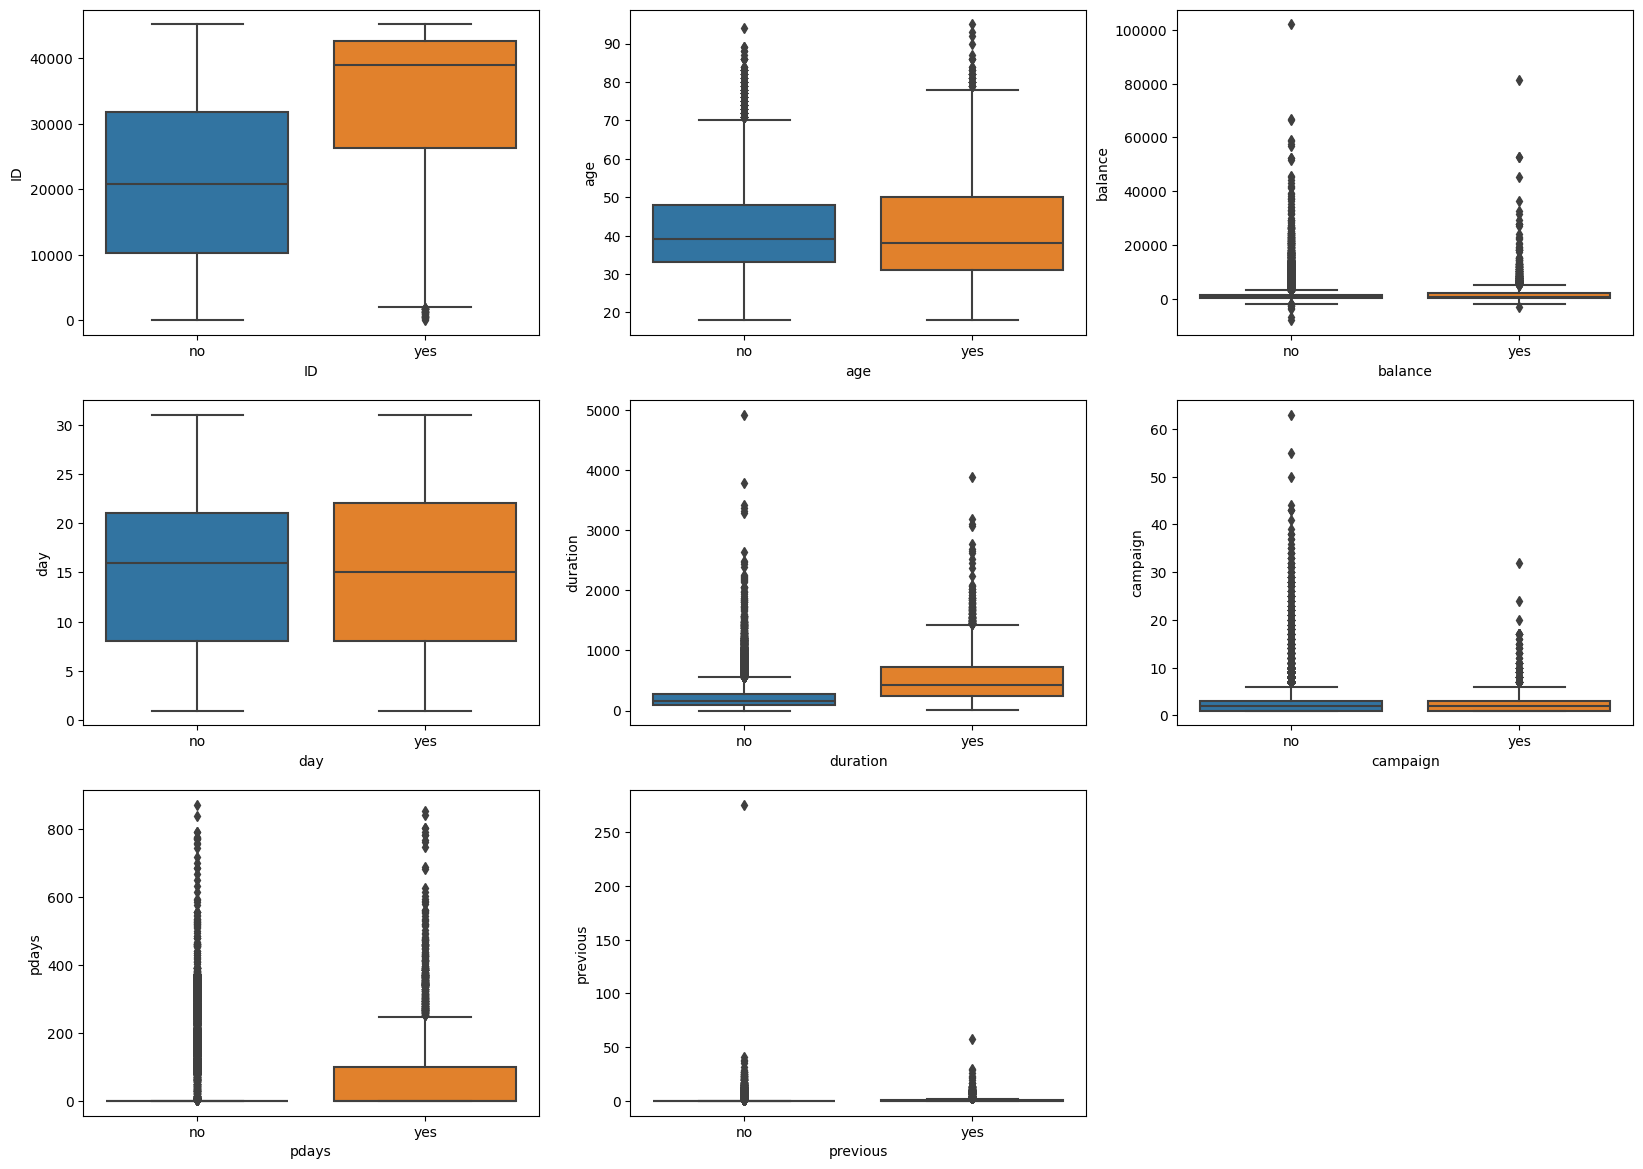

In [24]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribed", y= train[feature], data=train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

## Find Outliers in numerical features

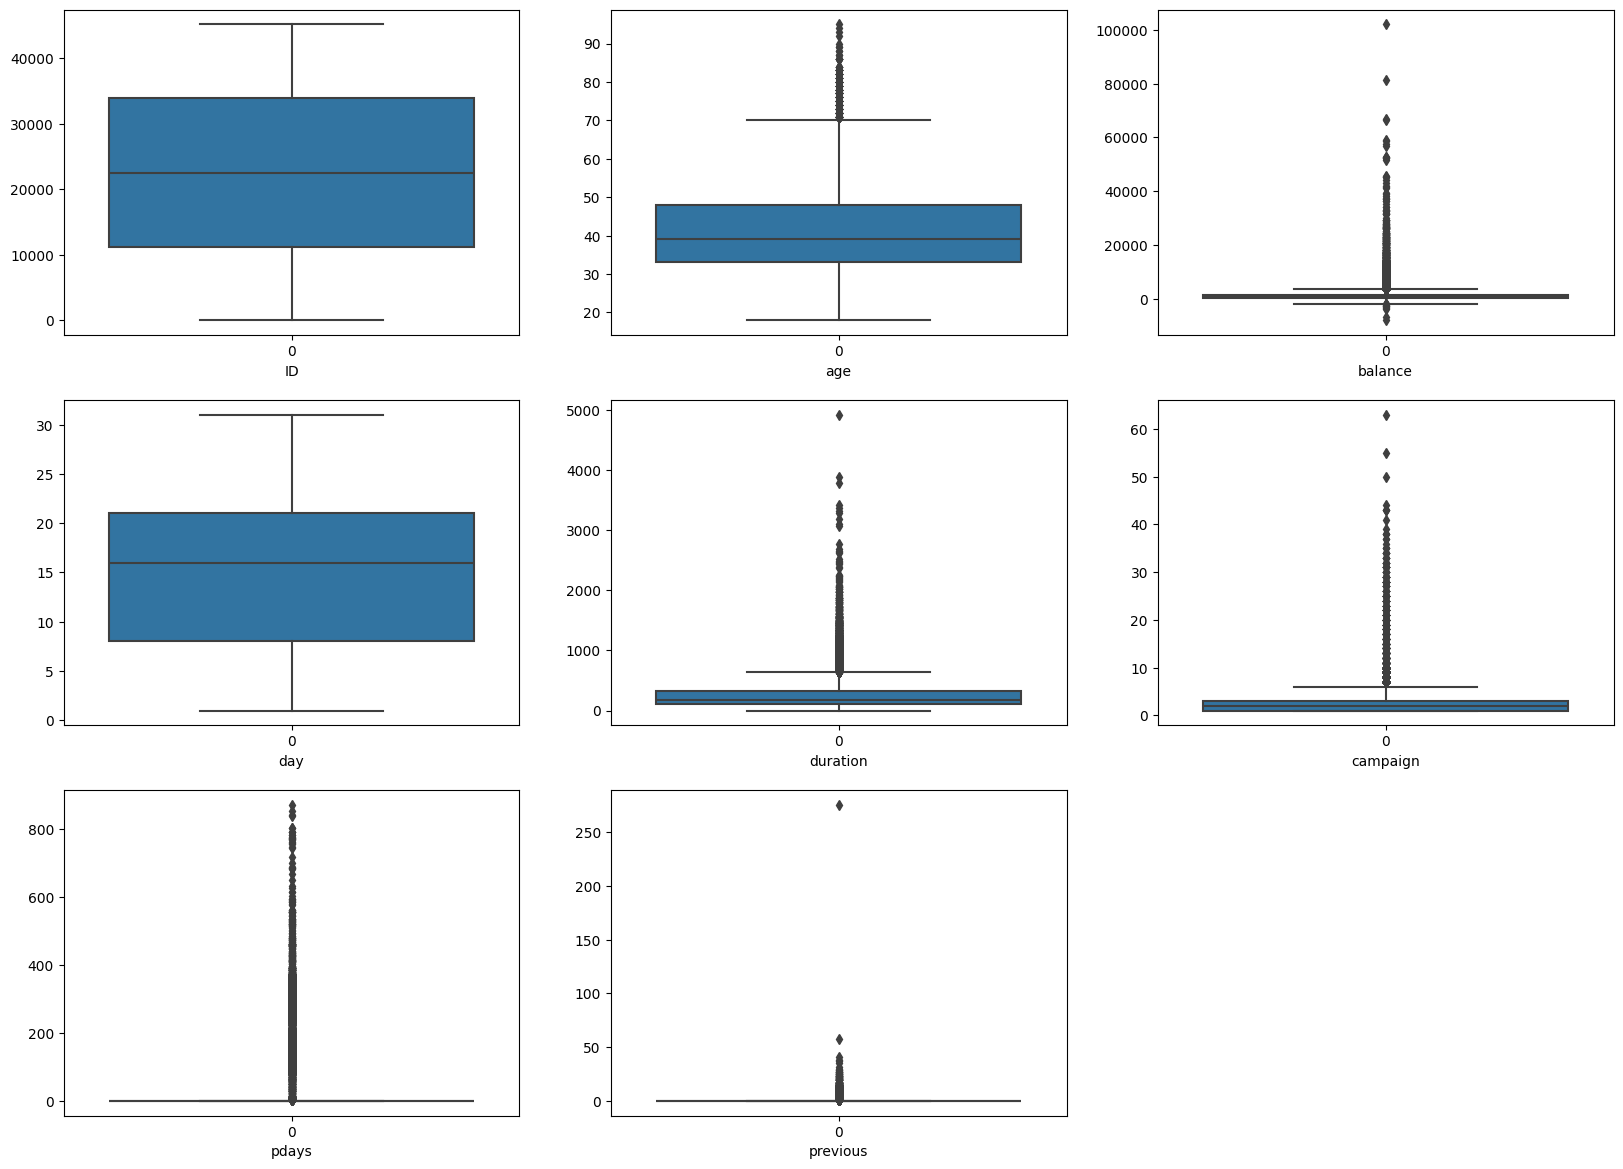

In [25]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Explore the Correlation between numerical features

In [26]:
print(train.dtypes)


ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object


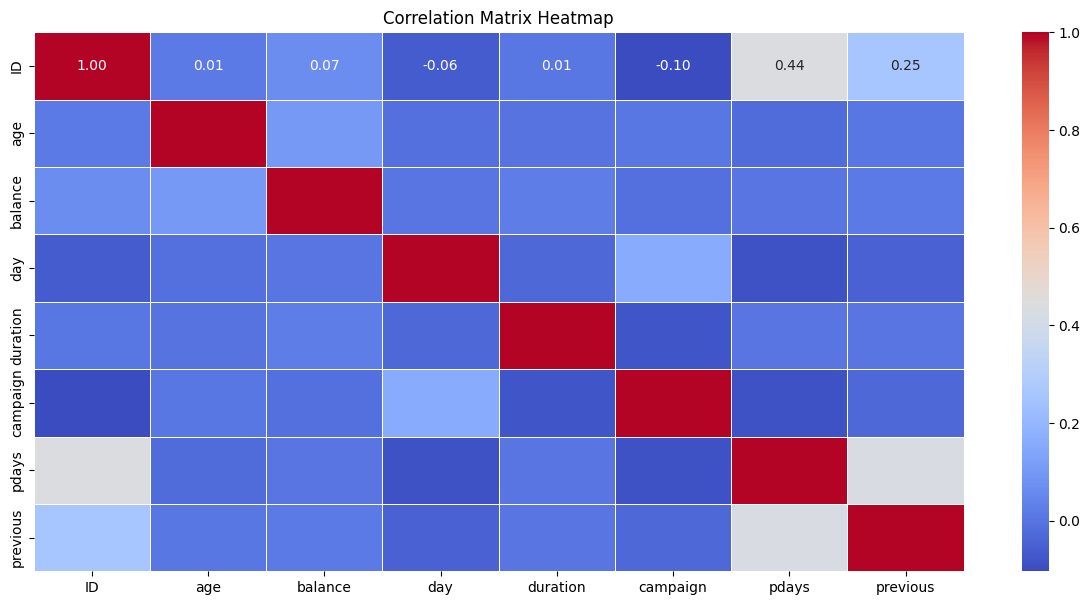

In [27]:

numeric_columns = train.select_dtypes(include=['float64', 'int64'])
cor_mat = numeric_columns.corr()
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



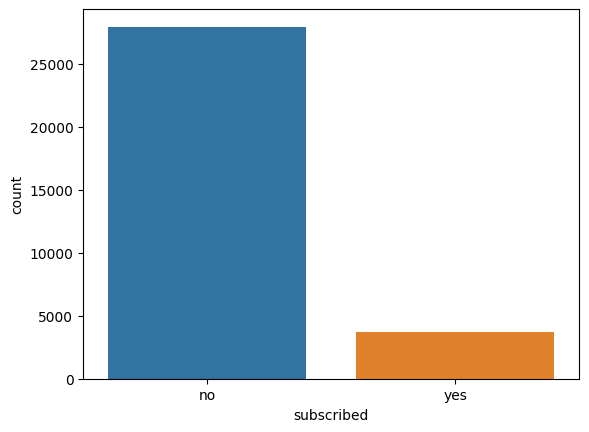

In [28]:
#total patient count based on cardio_results
sns.countplot(x='subscribed',data=train)
plt.show()

In [29]:
train['subscribed'].groupby(train['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [30]:
df=train.copy()

In [31]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [32]:
df.shape

(31647, 18)

In [33]:
print(df.columns)


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [34]:
df.groupby(['subscribed', 'default']).size()


subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [35]:
df.drop(['default'],axis=1, inplace=True)

In [36]:
df.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [37]:
# drop pdays as it has -1 value for around 40%+ 
df.drop(['pdays'],axis=1, inplace=True)

In [38]:
# remove outliers in feature age...
df.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [39]:
# remove outliers in feature balance...
df.groupby(['subscribed','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [40]:
# remove outliers in feature duration...
df.groupby(['subscribed','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [41]:
# remove outliers in feature campaign...
df.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [42]:
# remove outliers in feature previous...
df.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23553
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [43]:
df2= df[df['previous'] < 29]

In [44]:
# remove outliers in feature previous...
df2.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23553
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
yes         0            2371
            1             422
            2             327
            3      

In [45]:
print(df2.columns)


Index(['ID', 'age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')


In [46]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    col_name = col.strip()  # Remove extra spaces
    df2 = pd.concat([df2.drop(col_name, axis=1), pd.get_dummies(df2[col_name], prefix=col_name, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)


In [47]:
bool_columns = ['housing', 'loan', 'subscribed']
for col in bool_columns:
    df2[col + '_new'] = df2[col].apply(lambda x: 1 if x == 'yes' else 0)
    df2.drop(col, axis=1, inplace=True)


In [48]:
df2.head()

,ID,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan,housing_new,loan_new,subscribed_new
0,26110,56,1933,19,44,2,0,False,False,False,...,False,False,False,False,False,True,False,0,0,0
1,40576,31,3,20,91,2,0,False,False,False,...,False,False,False,False,False,True,False,0,0,0
2,15320,27,891,18,240,1,0,False,False,False,...,False,False,False,False,False,True,False,1,0,0
3,43962,57,3287,22,867,1,3,False,False,False,...,False,False,False,False,True,False,False,0,0,1
4,29842,31,119,4,380,1,0,False,False,False,...,False,False,False,False,False,True,False,1,0,0


# Split Dataset into Training set and Test set

In [49]:
X = df2.drop(['subscribed_new'],axis=1)
y = df2['subscribed_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [50]:
len(X_train)

25309

In [51]:
len(X_test)

6328

# Model Selection

In [52]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90537337 0.90537337 0.90616357 0.90853418 0.90930646]
0.906950189903642


In [54]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90912683 0.91327539 0.90952193 0.91189253 0.90693539]
0.9101504123029736


In [55]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [56]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

# Model Building

In [57]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [58]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
model_xgb.score(X_test,y_test)

0.9064475347661188

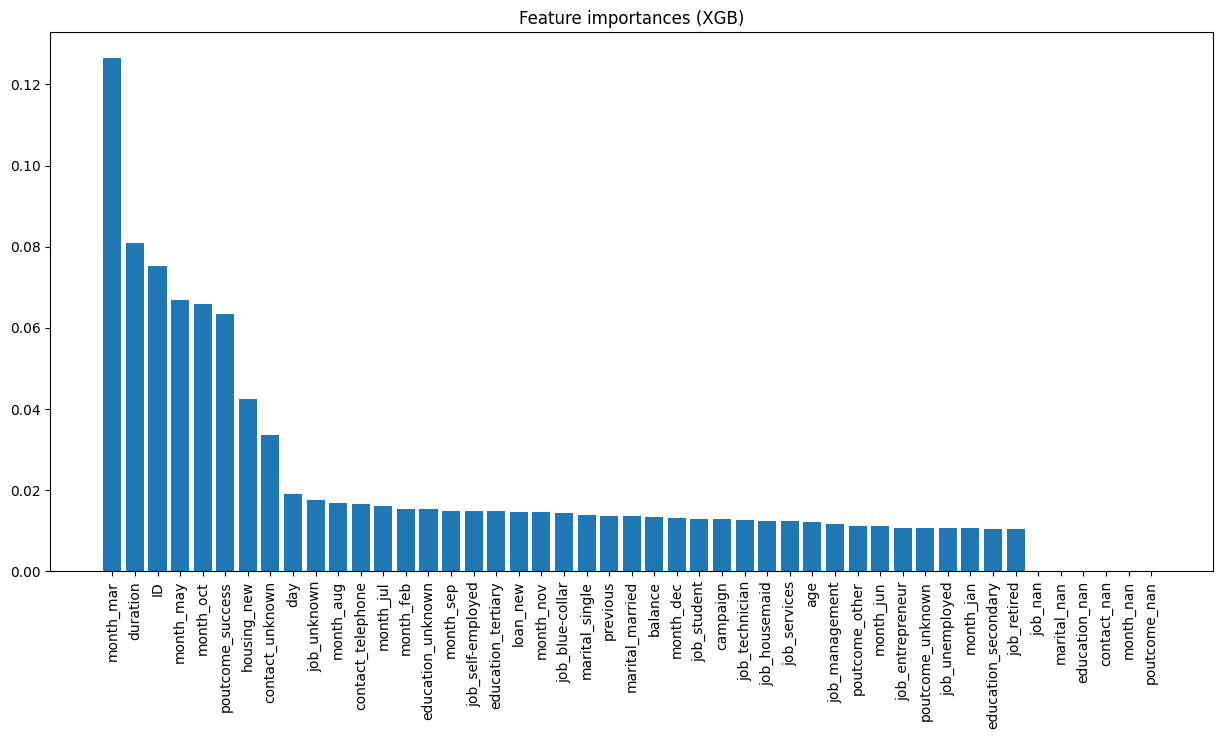

In [60]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [61]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[5346,  247],
       [ 345,  390]], dtype=int64)

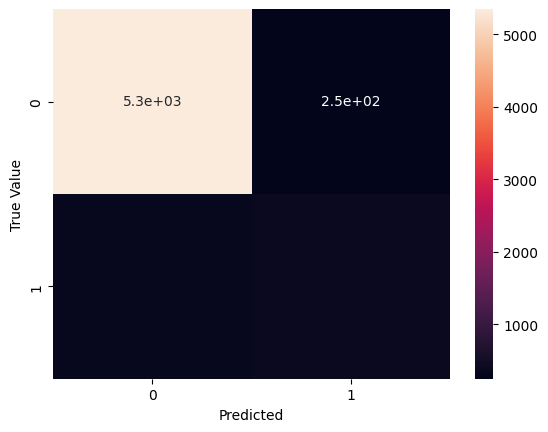

In [62]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()